In [1]:
# We'll be using the interact function which comes as a decorator in python.
from ipywidgets import interact
import ipywidgets as widgets

# Now, we're going to look at a small dataset which I collected of my biking data
import pandas as pd
import matplotlib.pyplot as plt

# The dataset is actually pretty important to me, because while I was biking in 2019
# I went into a roundabout - a traffic circle - a little too fast and completely wiped
# out. This makes it a great thing to visualize!
df=pd.read_csv("/Users/guywinfield/PycharmProjects/Data/wipeout.csv")
df=df.set_index(pd.to_datetime(df["timestamp"]))
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
timestamp,,,,,,,,,,,,,
2019-11-01 20:12:03,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
2019-11-01 20:12:04,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2019-11-01 20:12:07,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
2019-11-01 20:12:08,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
2019-11-01 20:12:10,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Useful for big wide datasets

potential_columns=[]
for col in df.columns:
    if df[col].dtype != "object":
        potential_columns.append(col)

In [5]:
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])

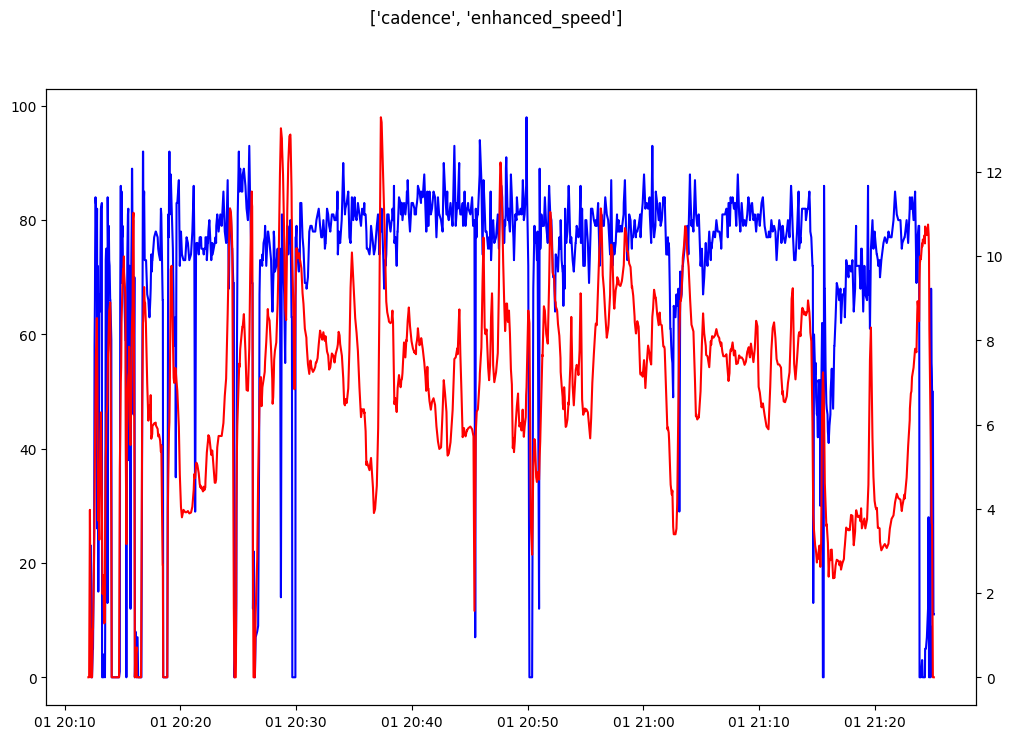

In [6]:
plot_data(["cadence","enhanced_speed"])

In [8]:
@interact(col_names=widgets.SelectMultiple(
    options=potential_columns,
    value=(potential_columns[0],),
    description='Columns'))
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])


interactive(children=(SelectMultiple(description='Columns', index=(0,), options=('cadence', 'distance', 'enhan…

In [9]:
@interact(heart_rate_bounds=widgets.IntRangeSlider(
    value=[80, 100],
    min=0,
    max=180,
    step=1,
    description='HR Range:',
    continuous_update=False,
    readout_format='d',),
    start=widgets.Text(
    value=str(df.index[0]),
    description='Start Time:'),
    end=widgets.Text(
    value=str(df.index[-1]),
    description='End Time:'))

def plot_hr(heart_rate_bounds, start, end):
    plt.figure(figsize=[12,8])

    plt.xlim(left=df.index[0],right=df.index[-1])
    plt.ylim(0,max(df["heart_rate"]))

    ndf=df[(df["heart_rate"]>heart_rate_bounds[0]) &
           (df["heart_rate"]<heart_rate_bounds[1]) &
           (df.index>start) & (df.index<end)]
    plt.scatter(ndf.index,ndf["heart_rate"])

interactive(children=(IntRangeSlider(value=(80, 100), continuous_update=False, description='HR Range:', max=18…